***
## Quantification<a id='quantification'></a>
***
[Back to Index](#Index)

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
from scipy.stats import sem
from scipy import stats as st 
import math
import IPython
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import colorsys
import importlib
import svgutils
from svgutils.compose import *
import os.path
from scipy.stats import mannwhitneyu
import ipywidgets
from plotParams import *


pBGMenu = ipywidgets.Dropdown(options=['Light', 'Dark'],value='Light',disabled=False, layout=ipywidgets.Layout(width='20%', height='40px'))
pBGLabel = ipywidgets.widgets.Label('Select plotting style', layout=ipywidgets.Layout(width='20%', height='30px'))
pBG = ipywidgets.widgets.VBox([pBGLabel,pBGMenu])
pBG

### Read csv created during analysis and create bar plot

In [2]:
baseColor = applyPlotStyle(pBGMenu.value)

#gene of interest
goi = 'tbx2'


if goi == 'nr2e3':
    dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRnr2e3F0s/"
    fName = "CRnr2e3F0s_counts.csv"
    geneList = ['wt','nr2e3']
    photoreceptors = ['R','U','S','M','L']
elif goi == 'foxq2':
    dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRfoxq2F0/"
    fName = "CRfoxq2F0_counts.csv"
    geneList = ['wt','foxq2']
    photoreceptors = ['R','U','S','M','L']
elif goi == 'skor1a':
    dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRskor1aF0s/"
    fName = "CRskor1aF0_counts.csv"
    geneList = ['wt','skor1a']
    photoreceptors = ['U','S']
elif goi == 'sall1a':
    dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRsall1aF0s/"
    fName = "CRsall1aF0_counts.csv"
    geneList = ['wt','sall1a']
    photoreceptors = ['R']
elif goi == 'xbp1':
    dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRxbp1F0s/"
    fName = "CRxbp1F0_counts.csv"
    geneList = ['wt','xbp1']
    photoreceptors = ['R','U','S','M']
elif goi == 'lrrfip1a':
    dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRlrrfip1aF0s/"
    fName = "CRlrrfip1aF0s_counts.csv"
    geneList = ['wt','lrrfip1a']
    photoreceptors = ['R','U','S','M']
    photoreceptors = ['S','M']
elif goi == 'tbx2':
    dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRtbx2F0s/"
    fName = "CRtbx2F0s_combinedCounts.csv"
    geneList = ['wt','tbx2a','tbx2b']
    photoreceptors = ['R','U','S','M','L']
    # photoreceptors = ['R','U']
elif goi == 'tbx2aF3_nr2e3F0':
    dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRtbx2aF3s_nr2e3F0/"
    fName = "tbx2aF3nr2e3F0_counts.csv"
    geneList = ['wt','nr2e3']
    # photoreceptors = ['R','U','S','M','L']
    photoreceptors = ['R','U']
else:
    dPath = "zzzzzzz"
    fName = "zzzzz.csv"
    geneList = ['wt','zzzzz']
    photoreceptors = ['R','U','S','M','L']



df = pd.read_csv(dPath + fName)
df.head(5)

Plotting style is Light


,filename,R,U,S,M,L,genotype,analysisFlag,genotypingFlag,excludeFlag,notes
0,20200821_5dpf_xOG_s1mCh_CRtbx2a_i05b,43.0,70.0,NaN,NaN,NaN,tbx2a,111,1,1,slightly dorsal -> exclude I guess
1,20200821_5dpf_xOG_s1mCh_CRtbx2a_i05d,35.0,101.0,NaN,NaN,NaN,tbx2a,111,1,0,central retina
2,20200821_5dpf_xOG_s1mCh_CRtbx2a_i06b,77.0,39.0,NaN,NaN,NaN,tbx2a,111,1,0,dorsal
3,20200821_5dpf_xOG_s1mCh_CRtbx2a_i06d,58.0,44.0,NaN,NaN,NaN,tbx2a,111,1,0,noteshere
4,20200821_5dpf_xOG_s1mCh_CRtbx2a_i07b,65.0,68.0,NaN,NaN,NaN,tbx2a,111,1,0,noteshere


## Standard plots (most genes)

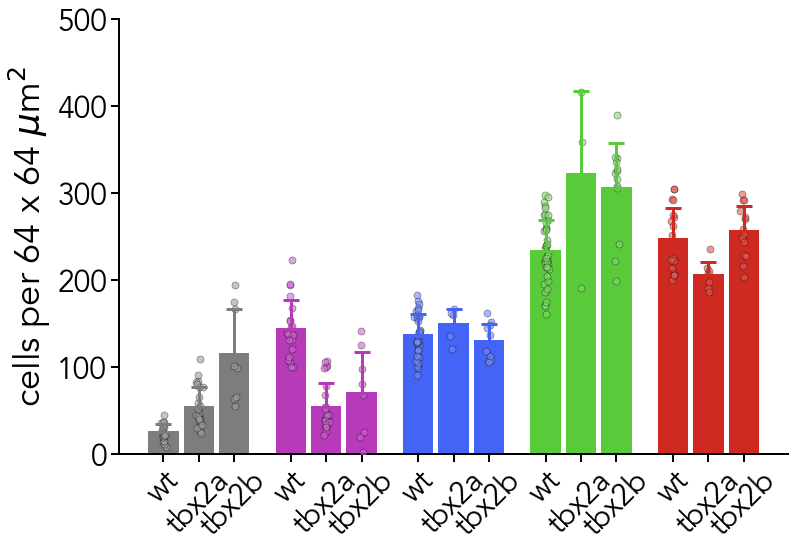

In [3]:
# geneList = ['wt','nr2e3']
nGenes = np.size(geneList)

# photoreceptors = ['R','U','S','M','L']
# photoreceptors = ['S','M']

plotname = ''
fH, axH = plt.subplots(figsize= [2.4*np.size(photoreceptors),8])

barW = nGenes+2; # bar width
barD = nGenes+1; # bar distance whitin 1 photoreceptor subtype
barP = -nGenes+1; # position in x-axis
barStep = 0.9; # distance between photoreceptor groups
barPos = []; #array to save bar positions


j=barP;
for gene in geneList:
    i=0;
    j=j+1;
    for pr in photoreceptors:
        i = i+barStep;
        countData = df[(df['genotype']==gene) & (df['excludeFlag']==False)][pr]
        jitter = np.random.randn(len(countData))*0.01
        textindent = 0.10;
        pH = plt.bar([i+j/barD], np.mean(countData), width=1/barW, color=lighten_color(zfC[pr],1), linewidth = 2, edgecolor = lighten_color(zfC[pr],1)); #color=zfC[pr], 
        pH = plt.errorbar(i+j/barD, np.mean(countData), yerr = [[0],[np.std(countData)]], ecolor=lighten_color(zfC[pr],1), elinewidth=3, capsize=8, capthick=3, zorder=9)
        pH = plt.scatter(np.ones(len(countData))*[i+j/barD]+jitter, countData, color=lighten_color(zfC[pr],.75), zorder=8, marker = 'o', s=50, edgecolor=baseColor, linewidth=0.5, alpha = .6);
        barPos = np.append(barPos,(i+j/barD))

formatFigure(fH, axH, pH)
axH.set_xticks(np.sort(barPos));

axH.set_xticklabels(geneList * len(photoreceptors));
# axH.set_ylim([0,80]); # for rods only
# axH.set_ylim([0,350]); # cone default (to have space for significance stars
axH.set_ylim([0,500]); # tbx2

# savePath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Manuscripts/2021_zfConeRNAseq/newGeneFigures/"

# savePath = 'C:/Users/pataklk/OneDrive - National Institutes of Health/zf/F0_Analysis/CRfoxq2F0/'
# plt.savefig(savePath + geneList[1] + "_counts.svg", transparent=True, format="svg", bbox_inches = "tight")

## Plots for tbx2 figures

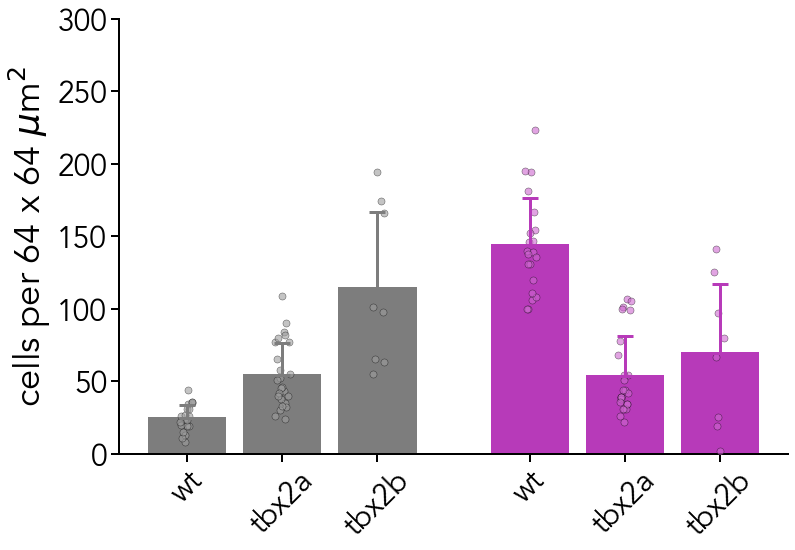

In [5]:
geneList = ['wt','tbx2a','tbx2b']
nGenes = np.size(geneList)
photoreceptors = ['R','U']

# photoreceptors = ['R','U','S','M','L']


plotname = ''
fH, axH = plt.subplots(figsize= [12,8])

barW = nGenes+2; # bar width
barD = nGenes+1; # bar distance whitin 1 photoreceptor subtype
barP = -nGenes+1; # position in x-axis
barStep = 0.9; # distance between photoreceptor groups
barPos = []; #array to save bar positions


j=barP;
for gene in geneList:
    i=0;
    j=j+1;
    for pr in photoreceptors:
        i = i+barStep;
        countData = df[(df['genotype']==gene) & (df['excludeFlag']==False)][pr]
        jitter = np.random.randn(len(countData))*0.01
        textindent = 0.10;
        pH = plt.bar([i+j/barD], np.mean(countData), width=1/barW, color=lighten_color(zfC[pr],1), linewidth = 2, edgecolor = lighten_color(zfC[pr],1)); #color=zfC[pr], 
        pH = plt.errorbar(i+j/barD, np.mean(countData), yerr = [[0],[np.std(countData)]], ecolor=lighten_color(zfC[pr],1), elinewidth=3, capsize=8, capthick=3, zorder=9)
        pH = plt.scatter(np.ones(len(countData))*[i+j/barD]+jitter, countData, color=lighten_color(zfC[pr],.75), zorder=8, marker = 'o', s=50, edgecolor=baseColor, linewidth=0.5, alpha = .6);
        barPos = np.append(barPos,(i+j/barD))

formatFigure(fH, axH, pH)
axH.set_xticks(np.sort(barPos));

axH.set_xticklabels(geneList * len(photoreceptors));
# axH.set_ylim([0,80]); # for rods only
# axH.set_ylim([0,350]); # cone default (to have space for significance stars
axH.set_ylim([0,300]); # tbx2

# savePath = 'C:/Users/pataklk/OneDrive - National Institutes of Health/zf/F0_Analysis/CRfoxq2F0/'
savePath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Manuscripts/2021_zfConeRNAseq/newGeneFigures/tbx2/"
# plt.savefig(savePath + "tbx2_RUcounts.svg", transparent=True, format="svg", bbox_inches = "tight")

## Stats

In [20]:
geneList = ['wt','tbx2b']
print('{0} vs. {1}:'.format(geneList[0],geneList[1]))

for pr in photoreceptors:
    # get counts for each photoreceptor subtype and exclude NaNs
    wtCount = df[(df['genotype']==(geneList[0]))&(df['excludeFlag']==False)][pr]
    wtCount = wtCount[~np.isnan(wtCount)]
    
    crCount = df[(df['genotype']==(geneList[1]))&(df['excludeFlag']==False)][pr]
    crCount = crCount[~np.isnan(crCount)]
    
    u, p = mannwhitneyu(wtCount, crCount)
    print('\t{0}:\t{1} % change'.format(pr,100*(np.mean(crCount)-np.mean(wtCount))/np.mean(wtCount)))
    print('\t{0}:\t{1}-fold change'.format(pr,(np.mean(crCount))/np.mean(wtCount)))
    print('\t\tU = {0:.3f}, p = {1:.10f}, nEyes: wt = {2:.0f}; cr = {3:.0f}'.format(u,p,len(wtCount),len(crCount)))


wt vs. tbx2b:
	R:	364.1891891891891 % change
	R:	4.641891891891892-fold change
		U = 0.000, p = 0.0000455427, nEyes: wt = 21; cr = 8
	U:	-51.65617754223253 % change
	U:	0.4834382245776747-fold change
		U = 150.000, p = 0.0013893222, nEyes: wt = 21; cr = 8


In [8]:
crCount

60    141.0
61     19.0
62     25.0
63     67.0
64     80.0
65     97.0
66    125.0
67      2.0
Name: U, dtype: float64

## Correlations

#### F&empty;[_tbx2_]

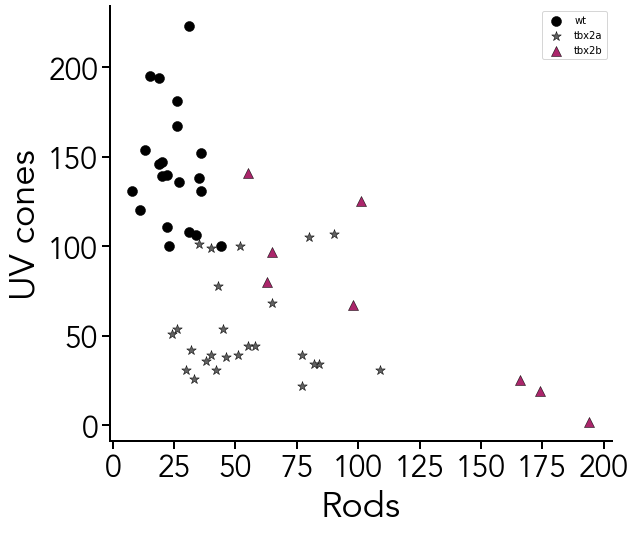

In [12]:
cdf = df[(~np.isnan(df['R'].values)&~np.isnan(df['U'].values))]
cdf = cdf[cdf['excludeFlag']==0]

geneList = ['wt','tbx2a','tbx2b']

nGenes = np.size(geneList)
photoreceptors = ['R','U']

plotname = ''
fH, axH = plt.subplots(figsize= [9,8])


for gene,geneColor,geneMarker in zip(geneList,['#000000','#616161','#ab266b'],['o','*','^']):
    countA = cdf[(cdf['genotype']==gene)][photoreceptors[0]]
    countB = cdf[(cdf['genotype']==gene)][photoreceptors[1]]
    pH = plt.scatter(countA, countB,
             color=geneColor, zorder=8, marker = geneMarker, s=100, edgecolor=baseColor, linewidth=0.5, alpha = 1, label = gene);


fontLabels = formatFigureMain(fH, axH, pH)
axH.set_xlabel('Rods', fontproperties=fontLabels)
axH.set_ylabel('UV cones', fontproperties=fontLabels)
# axH.set_xlim([-5,80]); # tbx2
# axH.set_ylim([-5,180]); # tbx2
axH.legend()


#### F3[_tbx2a_] & F&empty;[_nr2e3_]

In [ ]:
cdf = df[(~np.isnan(df['R'].values)&~np.isnan(df['U'].values))]
cdf = cdf[cdf['excludeFlag']==0]
cdf[cdf['tbx2a']=='++']

geneListA = ['++','+-','--']
# geneListA = ['++','+-']
geneListB = ['wt','nr2e3']
# geneListB = ['wt']

nGenes = np.size(geneListA) * np.size(geneListB)
photoreceptors = ['R','U']

plotname = ''
fH, axH = plt.subplots(figsize= [9,8])


for geneA,colorA in zip(geneListA,['#000000','#616161','#ab266b']):
    for geneB,markerB in zip(geneListB,['o','*']):
        countA = cdf[(cdf['tbx2a']==geneA) & (cdf['genotype']==geneB)][photoreceptors[0]]
        countB = cdf[(cdf['tbx2a']==geneA) & (cdf['genotype']==geneB)][photoreceptors[1]]
        pH = plt.scatter(countA, countB,
                 color=colorA, zorder=8, marker = markerB, s=100, edgecolor=baseColor, linewidth=0.5, alpha = 1, label = 'tbx2a'+geneA+' '+geneB);


fontLabels = formatFigureMain(fH, axH, pH)
axH.set_xlabel('Rods', fontproperties=fontLabels)
axH.set_ylabel('UV cones', fontproperties=fontLabels)
axH.set_xlim([-5,80]); # tbx2
axH.set_ylim([-5,180]); # tbx2
axH.legend()

# axH.set_xticks(np.sort(barPos));

# axH.set_xticklabels(geneList * len(photoreceptors));
# axH.set_ylim([0,80]); # for rods only
# axH.set_ylim([0,350]); # cone default (to have space for significance stars
# axH.set_ylim([0,500]); # tbx2


In [ ]:
cdf[(cdf['tbx2a']==geneA) & (cdf['genotype']==geneB)]